In [1]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.decomposition import FactorAnalysis

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [3]:
df = pd.read_csv('../datasets/diabetes_clean.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0,0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1


In [7]:
from sklearn.preprocessing import scale

In [9]:
df_features = df.drop('Outcome', axis=1)

In [10]:
df_scaled = pd.DataFrame(scale(df_features), columns=df_features.columns)

In [11]:
df = pd.concat([df_scaled, df['Outcome']], axis=1)

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.033518,0.563604,0.681605,0.167240,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.529859,-0.112017,-0.848988,-0.851551,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.695306,0.225793,1.212210,-1.331838,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.529859,-0.787638,-0.605446,-0.633239,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.680669,0.563604,0.156315,1.549885,5.484909,-0.020496,1


In [13]:
FEATURES = list(df.columns[:-1])
FEATURES

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [14]:
LABEL = 'Outcome'

In [26]:
def build_model(n_components):
    X = df[FEATURES]
    Y = df[LABEL]
    
    fa_obj = FactorAnalysis(n_components = n_components,
                           random_state = 10,
                           max_iter = 100000)
    X_new = fa_obj.fit_transform(X, Y)
    X = pd.DataFrame(X_new)
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    model = LogisticRegression(solver='liblinear', max_iter=1000)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    pred_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return {'factor_obj': fa_obj,
            'transform_x': X,
            'accuracy': acc,
            'precision': prec,
            'recall': recall}

In [27]:
def compare_results(result_dict):
    for key in result_dict:
        print('Test: ', key)
        
        print()
        print('accuracy_score: ', result_dict[key]['accuracy'])
        print('precision_score: ', result_dict[key]['precision'])
        print('recall_score: ', result_dict[key]['recall'])
        
        print()

In [28]:
def visualizing_results(result_dict):
    n_components = list(range(0, 8))
    acc = [result_dict[key]['accuracy'] for key in result_dict]
    precision = [result_dict[key]['precision'] for key in result_dict]
    recall = [result_dict[key]['recall'] for key in result_dict]
    
    plt.figure(figsize=(12, 10))
    plt.plot(n_components, acc, label='Accuracy')
    plt.plot(n_components, precision, label='Precision')
    plt.plot(n_components, recall, label='Recall')
    
    plt.xlabel('n_components')
    plt.ylabel('score');
    
    plt.legend()
    plt.show()

In [43]:
result_dict = {}
for i in range(1, 9):
    result_dict['n_components - ' + str(i)] = build_model(i)

In [44]:
compare_results(result_dict)

Test:  n_components - 1

accuracy_score:  0.7597402597402597
precision_score:  0.7575757575757576
recall_score:  0.46296296296296297

Test:  n_components - 2

accuracy_score:  0.6883116883116883
precision_score:  0.6341463414634146
recall_score:  0.4406779661016949

Test:  n_components - 3

accuracy_score:  0.7142857142857143
precision_score:  0.6363636363636364
recall_score:  0.5

Test:  n_components - 4

accuracy_score:  0.7467532467532467
precision_score:  0.7
recall_score:  0.5932203389830508

Test:  n_components - 5

accuracy_score:  0.7467532467532467
precision_score:  0.7272727272727273
recall_score:  0.5423728813559322

Test:  n_components - 6

accuracy_score:  0.7532467532467533
precision_score:  0.6444444444444445
recall_score:  0.5686274509803921

Test:  n_components - 7

accuracy_score:  0.7922077922077922
precision_score:  0.8292682926829268
recall_score:  0.576271186440678

Test:  n_components - 8

accuracy_score:  0.7662337662337663
precision_score:  0.6666666666666666
r

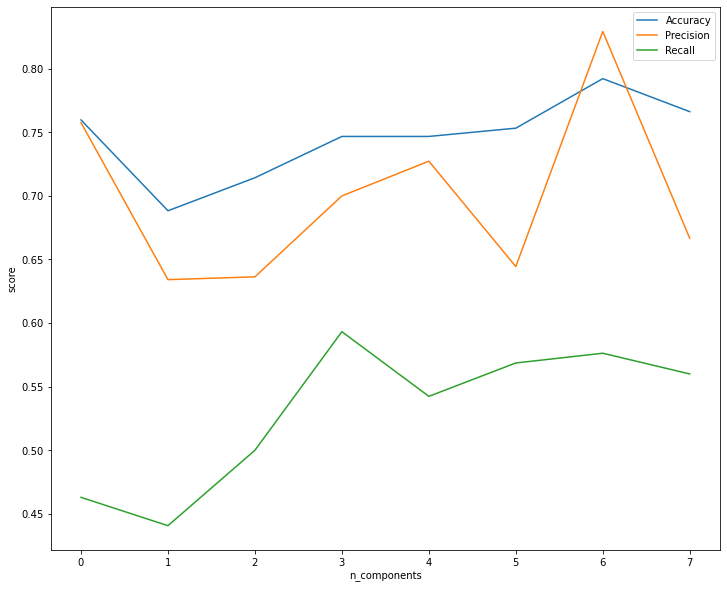

In [45]:
visualizing_results(result_dict)

In [46]:
result_dict

{'n_components - 1': {'factor_obj': FactorAnalysis(copy=True, iterated_power=3, max_iter=100000, n_components=1,
                 noise_variance_init=None, random_state=10,
                 svd_method='randomized', tol=0.01),
  'transform_x':             0
  0    0.873396
  1   -1.082471
  2    1.430982
  3   -1.016954
  4    0.444509
  ..        ...
  763  0.097969
  764 -0.022187
  765 -0.311538
  766  0.135076
  767 -0.862085
  
  [768 rows x 1 columns],
  'accuracy': 0.7597402597402597,
  'precision': 0.7575757575757576,
  'recall': 0.46296296296296297},
 'n_components - 2': {'factor_obj': FactorAnalysis(copy=True, iterated_power=3, max_iter=100000, n_components=2,
                 noise_variance_init=None, random_state=10,
                 svd_method='randomized', tol=0.01),
  'transform_x':             0         1
  0    1.105029  0.580834
  1   -1.019965  0.202445
  2    1.246155 -0.558017
  3   -1.145362 -0.398664
  4    0.220779 -0.920257
  ..        ...       ...
  763  0.837